# <div align="center">Predict Car Traffic Injury</div>



In this document we follow the CRISP-DM process and methodolgies...


# 1. CRISP-DM: Business Understanding

bla bla bla

<br>
<br>
<br>

# 2. CRISP-DM: Data Understanding

In this section, the following will be addressed:<br><br>
**2.1. Collect Initial Data**<br>
2.1.1. Import the relevant Python packages that are going to be used.<br>
2.1.2. Acquire the data.<br>
2.1.3. Record of the data acquisition process.<br>
2.2.4. HTML Reprot.<br>
<br>
<br>

**2.2. Data Description**<br>
2.2.1. Shape of the Dataset.<br>
2.2.2. Head snippet.<br>
2.2.3. Dataset info.<br>
<br>
<br>

**2.3. Explore the Data**<br>
2.3.1. Basic Statistics - For numeric models, to calculate Mean, Median, mode, ... <br>
2.3.2. Tabular Report - For Continuos and Categorical Features (Refer to HTML Reports please). <br>
2.3.3. Correlations + Heat Map.<br>
<br>
<br>

**2.4. Verify Data Quality**<br>
2.4.1. Completnesss - Missing Values Summary.<br>
2.4.2. Irregular cardinality, (1, too high for categorical, too low for continuos)<br>
2.4.3. Consistency - Handle outliers, out of range data or invalid formats (if any).<br>
2.4.4. Uniqueness - Remove duplicated or irrelevant repetition in data.<br>


<br>
<br>

## 2.1. Collect Initial Data


This a generic intial step, to start working on the data:<br>
2.1.1. Import the relevant Python packages that are going to be used.<br>
2.1.2. Acquire the data.<br>
2.1.3. Record of the data acquisition process.<br>

In [31]:
# 2.1.1. Import the relevant Python packages that are going to be used

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


In [32]:
# 2.1.2. Acquire the data

# A generic utilies file with generic functionallity
from misc.utilities import acquire_dataset

# Download & load the dataset
# If the file already downloaded, it will not be re-downloaded (to speed up work efficiency)
df = acquire_dataset()
# df

File already exists...


<span style="color:cyan">


2.1.3. Record of the data acquisition process.<br>

The data acquired from: https://catalog.data.gov/dataset/traffic-crashes-crashes
<br>
The above website belongs to USA government free datasets advised by the course instructions.

</span>


In [95]:
# Helper functions

def get_continuous_feature_details(my_df, my_feature):
    my_df[my_feature] = pd.to_numeric(my_df[my_feature], errors='coerce')
    # Printing unique values
    unique_values = my_df[my_feature].unique()
    sorted_unique_values = np.sort(unique_values)
    len_unique_values = len(unique_values)
    unique_values_str = ', '.join(map(str, sorted_unique_values[:5])) + ', ..., ' + ', '.join(map(str, sorted_unique_values[-5:]))
    max_value = my_df[my_feature].max()
    min_value = my_df[my_feature].min()
    # print(f"{my_feature}: Unique Len={len_unique_values}, Unique={sorted_unique_values}, Max={max_value}, Min={min_value}")
    print(f"{my_feature}:\n  Unique Len={len_unique_values}\n  Unique={unique_values_str}\n  Max={max_value}\n  Min={min_value}")

    return len_unique_values, sorted_unique_values, max_value, min_value
    

def dump_feature_frequency_to_a_file(my_df, my_feature):
    value_counts = my_df[my_feature].value_counts()
    # value_counts.to_csv(f"{my_feature}_value_counts.csv", index=True, header=['Frequency'])
    # Open a file to write
    with open(f"{my_feature}_value_counts.txt", 'w') as file:
        # Write a header row
        file.write(f"{'Value':<20}{'Frequency':<10}\n")
        file.write(f"{'-'*20}{'-'*10}\n")
        
        # Iterate over the Series and write each value and its frequency
        for value, count in value_counts.items():
            file.write(f"{value:<20}{count:<10}\n")



<br>
<br>

## 2.2. Data Description

In this phase we investigate the following aspects:<br>
2.2.1. Shape of the Dataset.<br>
2.2.2. Head snippet.<br>
2.2.3. Dataset info.<br>
2.2.4. Numerical Feature Distribution.<br>
2.2.5. Catagorical Feature Distribution.<br>
2.2.6 HTML report<br>

In [33]:
# 2.2.1. Shape of the Dataset.

def get_dataset_shape(df):
    # Create a new DataFrame to display the shape information
    shape_df = pd.DataFrame({
        'Aspect': ['Records (Instances)', 'Features (Columns)'],
        'Number': [df.shape[0], df.shape[1]]
    })
    return shape_df

# Display the DataFrame
get_dataset_shape(df)


,Aspect,Number
0,Records (Instances),814788
1,Features (Columns),48


In [34]:
# 2.2.2. Head snippet

def get_dataset_head(df):
    df.head()

get_dataset_head(df)


In [35]:
# 2.2.3. Dataset info

def get_dataset_info(df):
    df.info()

get_dataset_info(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814788 entries, 0 to 814787
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                814788 non-null  object 
 1   CRASH_DATE_EST_I               60921 non-null   object 
 2   CRASH_DATE                     814788 non-null  object 
 3   POSTED_SPEED_LIMIT             814788 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         814788 non-null  object 
 5   DEVICE_CONDITION               814788 non-null  object 
 6   WEATHER_CONDITION              814788 non-null  object 
 7   LIGHTING_CONDITION             814788 non-null  object 
 8   FIRST_CRASH_TYPE               814788 non-null  object 
 9   TRAFFICWAY_TYPE                814788 non-null  object 
 10  LANE_CNT                       199008 non-null  float64
 11  ALIGNMENT                      814788 non-null  object 
 12  ROADWAY_SURFACE_COND          

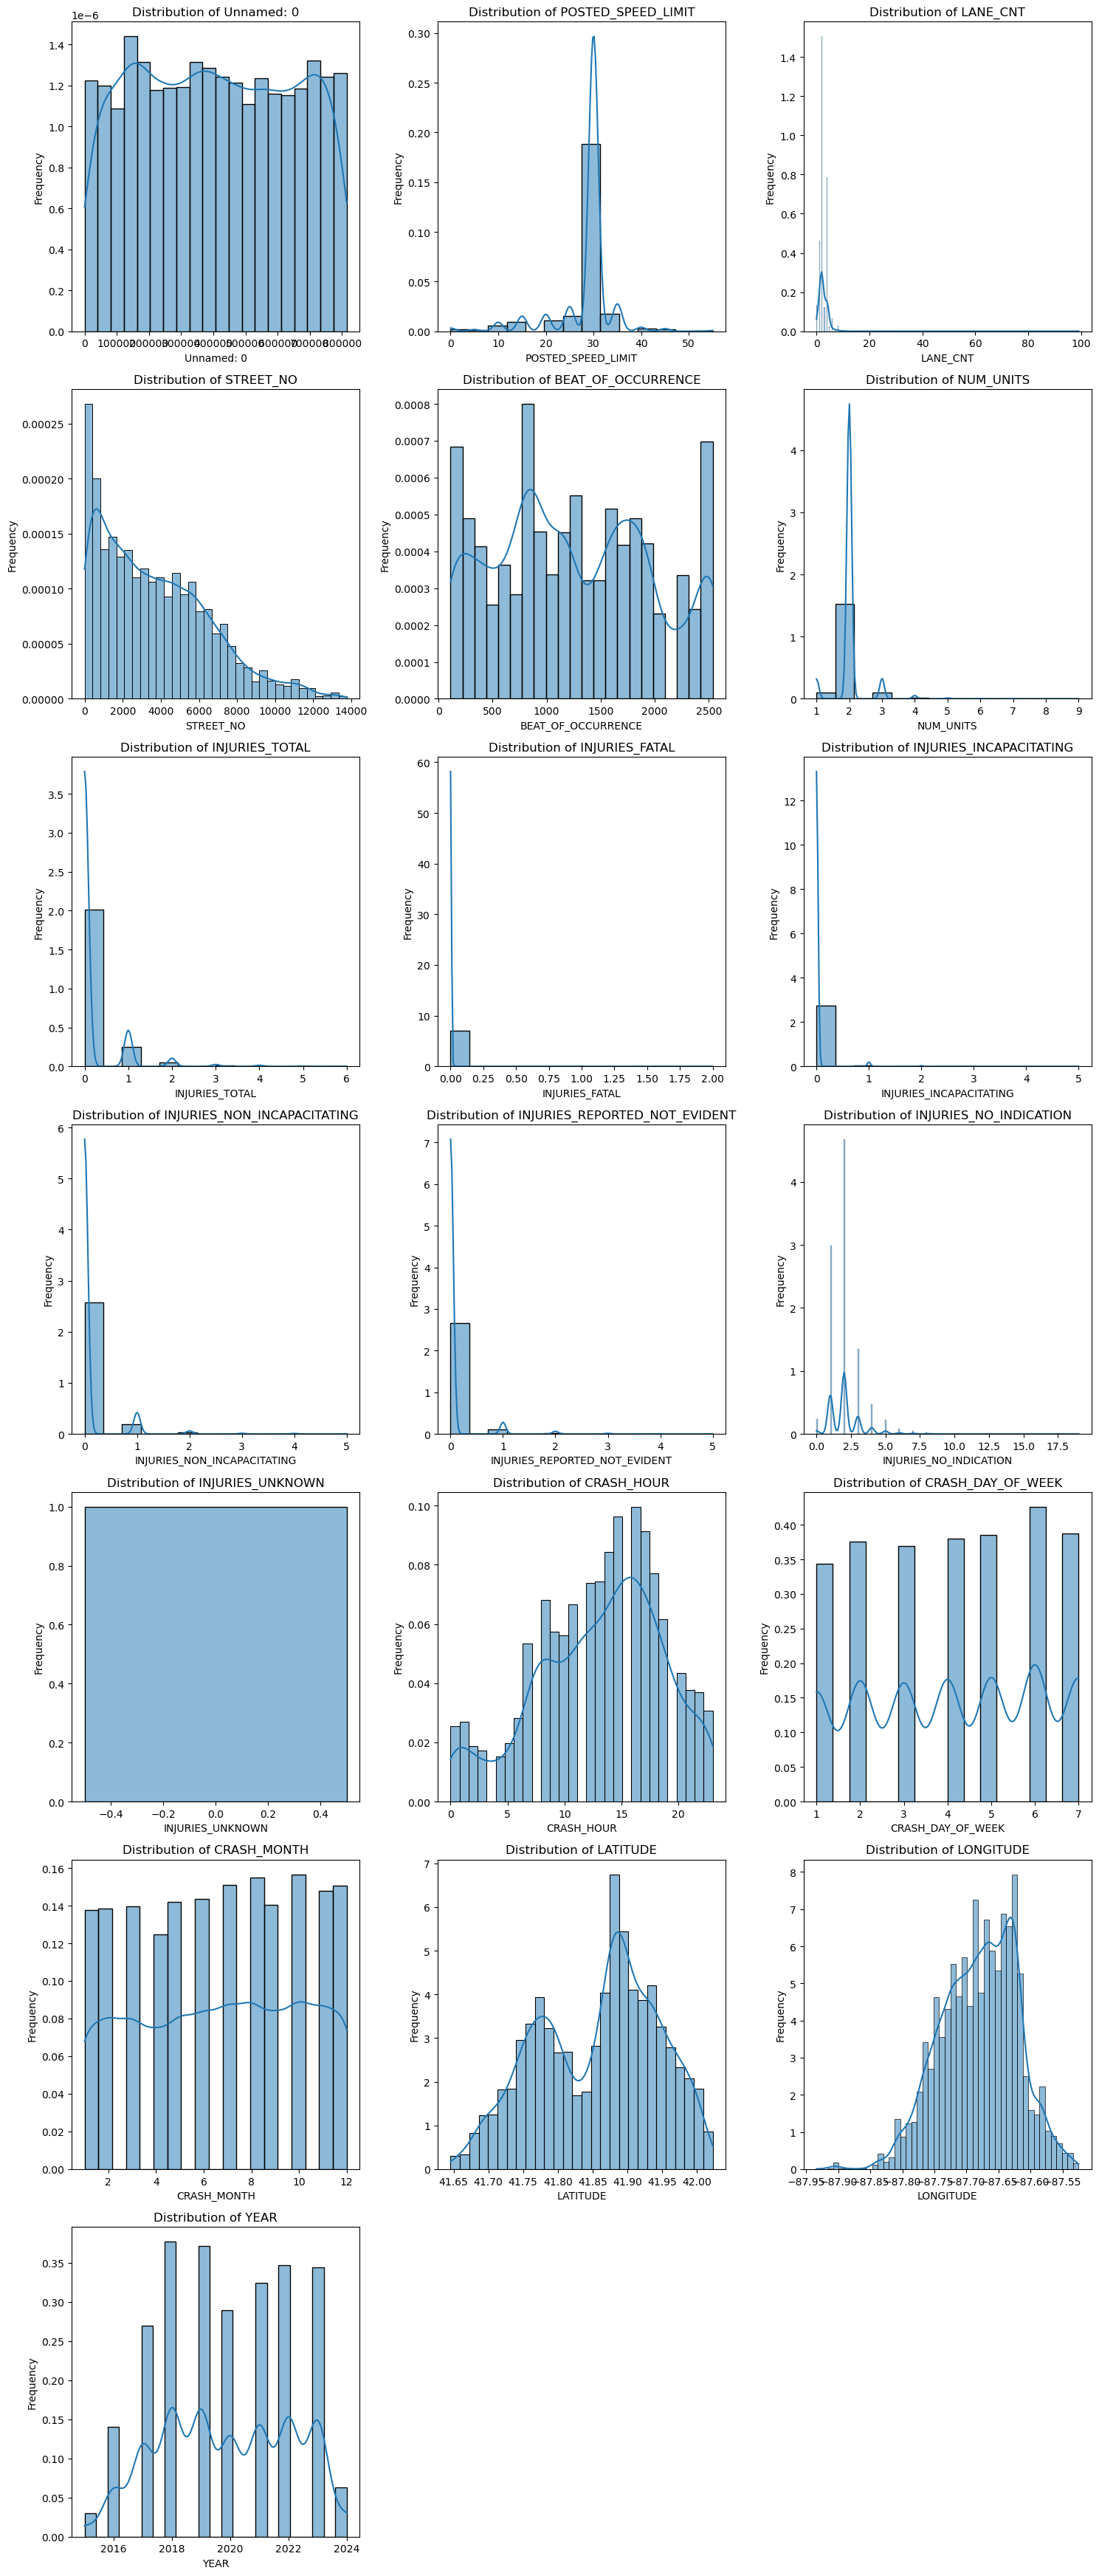

In [6]:
# 2.2.4. Numerical Feature Distribution

# Filter out deprecated warnings from Seaborn
warnings.filterwarnings("ignore")

# Select only numeric columns for distribution plots
numeric_df = df.select_dtypes(include=[np.number])

# Determine the number of rows/columns for the subplot grid
num_features = numeric_df.shape[1]
num_rows = int(np.ceil(num_features / 3))  # Adjust the denominator to change the number of columns

# Create a figure and a grid of subplots
plt.figure(figsize=(15, num_rows * 5))

for i, column in enumerate(numeric_df.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(numeric_df[column], kde=True, stat = 'density')

    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

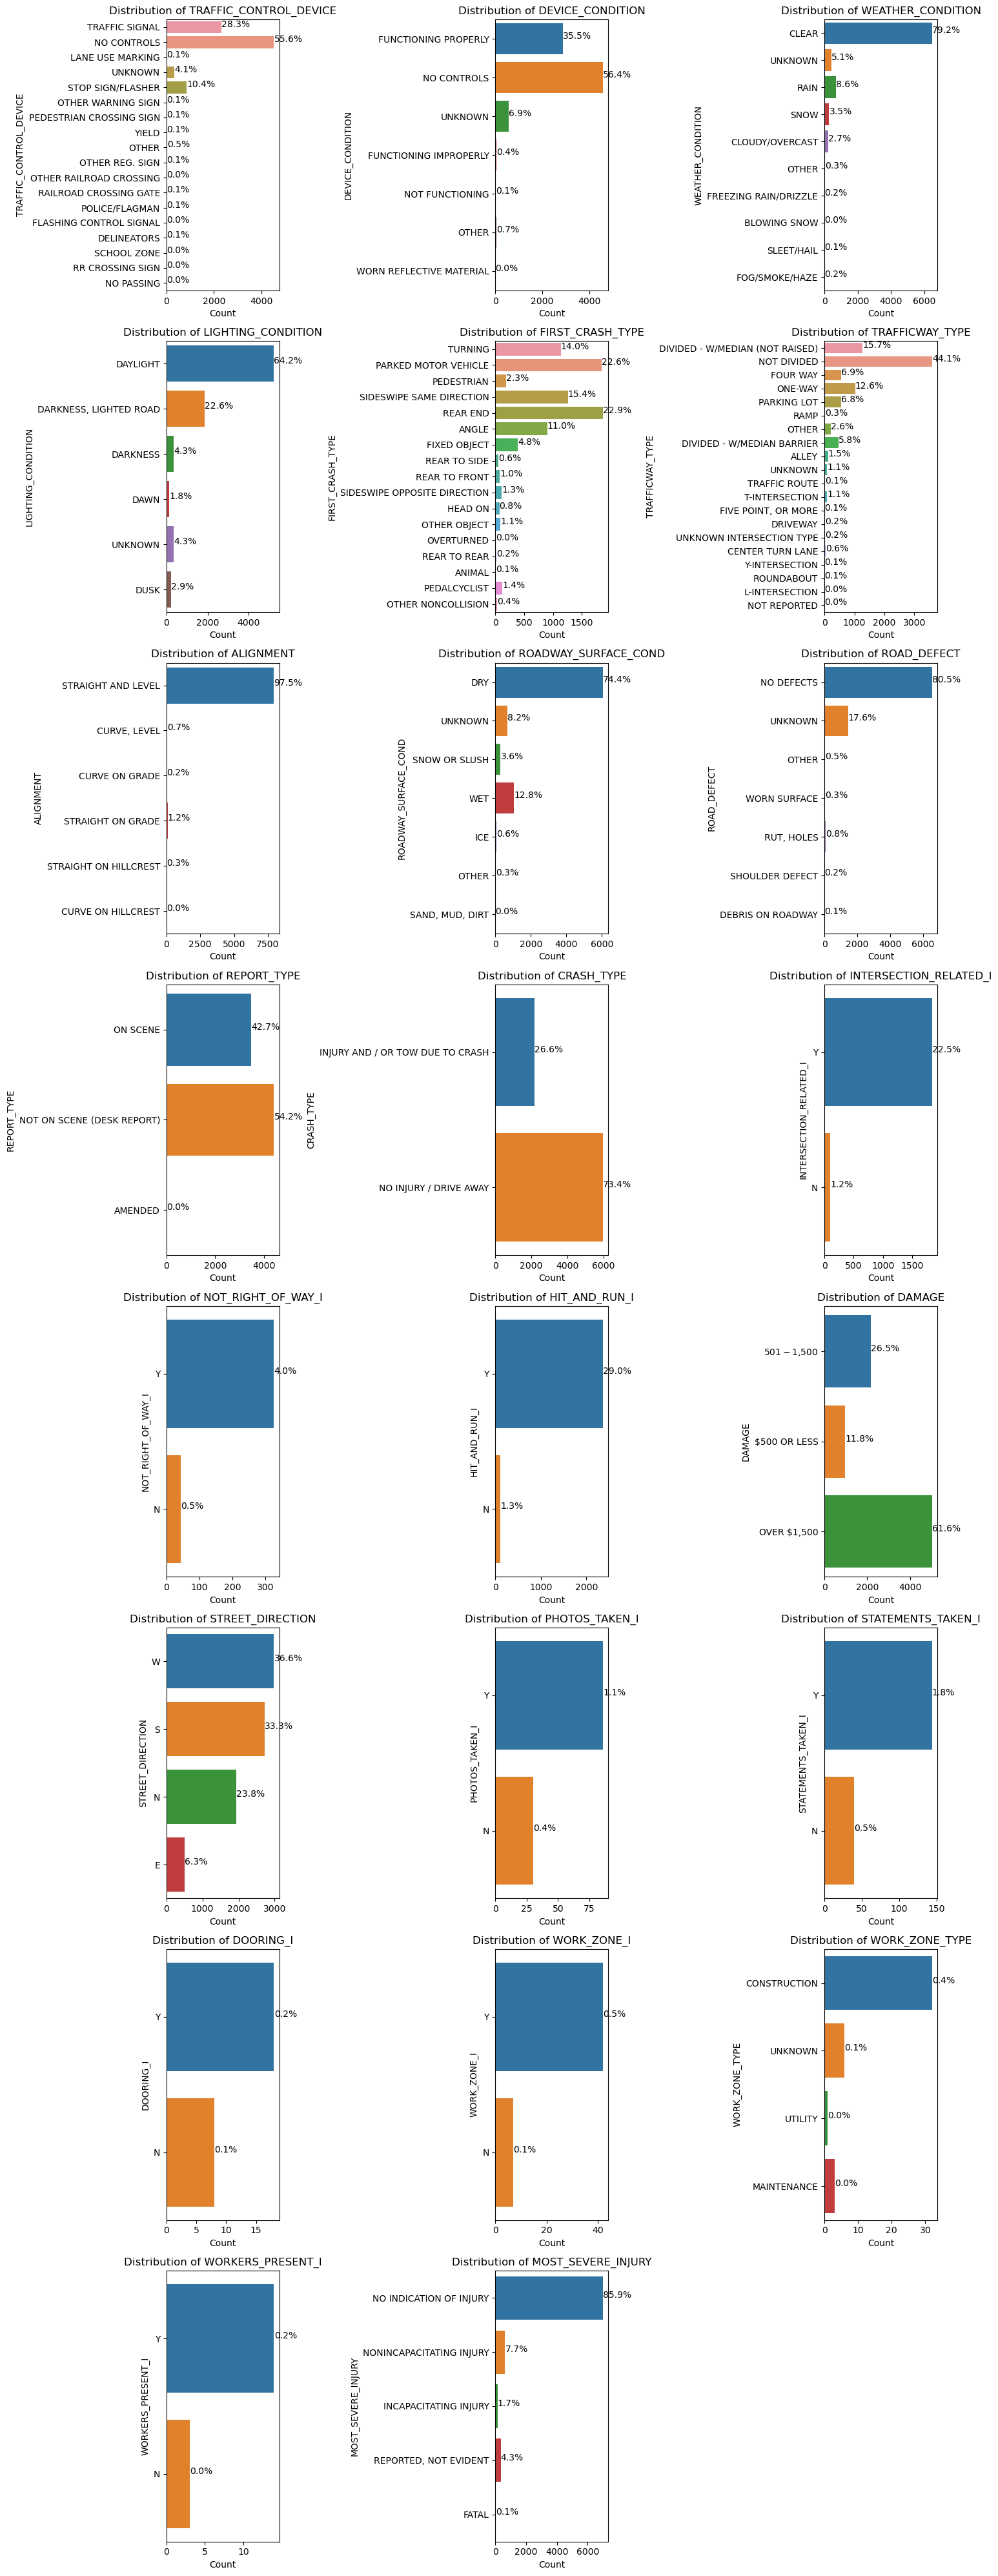

In [21]:
## 2.2.5 Catagorical Feature Distribution

# Select only categorical columns
categorical_df = df.select_dtypes(include=['object', 'category']) #exclude=['number']

# Delete some of the columns due ot cardinality issues ( they have alot of levels like Id)
categorical_df = categorical_df.drop(['PRIM_CONTRIBUTORY_CAUSE','SEC_CONTRIBUTORY_CAUSE','STREET_NAME','DATE_POLICE_NOTIFIED','LOCATION','CRASH_RECORD_ID' , 'CRASH_DATE_EST_I','CRASH_DATE'] , axis = 1)

# Determine the number of rows/columns for the subplot grid
num_features = categorical_df.shape[1]
num_rows = int(np.ceil(num_features / 3))  # Adjust for desired number of columns per row

plt.figure(figsize=(15, num_rows * 5))

for i, column in enumerate(categorical_df.columns):
    plt.subplot(num_rows, 3, i + 1)
    ax = sns.countplot(y=categorical_df[column])
    total = len(categorical_df[column])  # Total number of data points for the percentage calculation
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02  # Shifts the text to the right side of the bars
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


<br>
<br>

## 2.3. Explore the Data

2.3.1. Basic Statistics - For numeric models, to calculate Mean, Median, mode, ... <br>
2.3.2. Tabular Report - For Continuos and Categorical Features (Refer to HTML Reports please). <br>
2.3.3. Correlations + Heat Map.<br>


In [37]:
# 2.3.1. Continuous Features Tabular Report

def get_continuous_features_tabular_report(df):
    # continuous_features_tabular_report_df = df.describe(include=['number'])
    return df.describe(include=['number'])

# Transpose - More friendly print
continuous_features_transpose_tabular_report_df = get_continuous_features_tabular_report(df).transpose()

continuous_features_transpose_tabular_report_df


,count,mean,std,min,25%,50%,75%,max
POSTED_SPEED_LIMIT,814788.0,28.405658,6.168020,0.000000,30.000000,30.000000,30.000000,9.900000e+01
LANE_CNT,199008.0,13.330213,2961.608593,0.000000,2.000000,2.000000,4.000000,1.191625e+06
STREET_NO,814788.0,3689.471208,2886.846405,0.000000,1250.000000,3201.000000,5600.000000,4.511000e+05
BEAT_OF_OCCURRENCE,814783.0,1243.649172,705.298265,111.000000,714.000000,1211.000000,1822.000000,6.100000e+03
NUM_UNITS,814788.0,2.034870,0.452707,1.000000,2.000000,2.000000,2.000000,1.800000e+01
INJURIES_TOTAL,813012.0,0.189815,0.565798,0.000000,0.000000,0.000000,0.000000,2.100000e+01
INJURIES_FATAL,813012.0,0.001191,0.037361,0.000000,0.000000,0.000000,0.000000,4.000000e+00
INJURIES_INCAPACITATING,813012.0,0.019938,0.165285,0.000000,0.000000,0.000000,0.000000,1.000000e+01
INJURIES_NON_INCAPACITATING,813012.0,0.107078,0.422087,0.000000,0.000000,0.000000,0.000000,2.100000e+01
INJURIES_REPORTED_NOT_EVIDENT,813012.0,0.061608,0.319045,0.000000,0.000000,0.000000,0.000000,1.500000e+01


In [38]:
# 2.3.2. Categorical Features Tabular Report

def get_categorical_features_tabular_report(df):
    return df.describe(exclude=['number'])

# Transpose - More friendly print
categorical_features_transpose_tabular_report_df = get_categorical_features_tabular_report(df).transpose()

categorical_features_transpose_tabular_report_df


,count,unique,top,freq
CRASH_RECORD_ID,814788,814788,89dc61af34d393db950397f0cc06d53b56d1f5e5fa14d4...,1
CRASH_DATE_EST_I,60921,2,Y,53081
CRASH_DATE,814788,534899,12/29/2020 05:00:00 PM,30
TRAFFIC_CONTROL_DEVICE,814788,19,NO CONTROLS,463168
DEVICE_CONDITION,814788,8,NO CONTROLS,468583
WEATHER_CONDITION,814788,12,CLEAR,638955
LIGHTING_CONDITION,814788,6,DAYLIGHT,521065
FIRST_CRASH_TYPE,814788,18,PARKED MOTOR VEHICLE,189339
TRAFFICWAY_TYPE,814788,20,NOT DIVIDED,353897
ALIGNMENT,814788,6,STRAIGHT AND LEVEL,795005


In [39]:
# 2.3.3. Correlation insights + HeatMap

def get_correlation_insights(df):
    # # Get the relevant columns
    subset_df = df[get_continuous_features_tabular_report(df).columns]

    # Calculate the correlation matrix
    # correlation_matrix = subset_df.corr()
    return subset_df.corr()

correlation_matrix = get_correlation_insights(df)
correlation_matrix

# # Create a heatmap using seaborn
# plt.figure(figsize=(16, 14))
# sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.8)

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
POSTED_SPEED_LIMIT,1.000000,0.000979,-0.019587,-0.035460,0.047738,0.076964,0.007388,0.029120,0.059093,0.042361,0.101507,NaN,0.014174,0.008060,0.010672,-0.003566,0.006602
LANE_CNT,0.000979,1.000000,-0.000889,0.003390,-0.000278,-0.001129,-0.000102,-0.000415,-0.000838,-0.000672,-0.001819,NaN,0.000268,0.002889,-0.001943,0.000833,0.000092
STREET_NO,-0.019587,-0.000889,1.000000,-0.008733,0.007034,0.010944,0.006430,0.003728,0.008295,0.005750,-0.038327,NaN,-0.000383,-0.008104,-0.000668,-0.074045,-0.011236
BEAT_OF_OCCURRENCE,-0.035460,0.003390,-0.008733,1.000000,0.021971,-0.038895,-0.007791,-0.014683,-0.032311,-0.017710,-0.009602,NaN,0.006597,0.003654,0.000440,0.153892,-0.042504
NUM_UNITS,0.047738,-0.000278,0.007034,0.021971,1.000000,0.108469,0.008572,0.038248,0.083439,0.061154,0.169555,NaN,0.005129,0.000960,0.010064,0.003436,-0.002546
INJURIES_TOTAL,0.076964,-0.001129,0.010944,-0.038895,0.108469,1.000000,0.098466,0.338678,0.767255,0.571369,-0.184474,NaN,0.002474,-0.005047,0.012008,-0.016592,0.006440
INJURIES_FATAL,0.007388,-0.000102,0.006430,-0.007791,0.008572,0.098466,1.000000,0.046947,0.022412,0.003546,-0.030791,NaN,-0.006175,-0.002200,0.001628,-0.002671,0.000127
INJURIES_INCAPACITATING,0.029120,-0.000415,0.003728,-0.014683,0.038248,0.338678,0.046947,1.000000,0.053584,0.006166,-0.082205,NaN,-0.004742,-0.002863,0.005132,-0.002838,0.000346
INJURIES_NON_INCAPACITATING,0.059093,-0.000838,0.008295,-0.032311,0.083439,0.767255,0.022412,0.053584,1.000000,0.007304,-0.149288,NaN,0.000942,-0.004966,0.009950,-0.009233,0.001703
INJURIES_REPORTED_NOT_EVIDENT,0.042361,-0.000672,0.005750,-0.017710,0.061154,0.571369,0.003546,0.006166,0.007304,1.000000,-0.083452,NaN,0.006322,-0.000640,0.005282,-0.015423,0.008974


<Axes: >

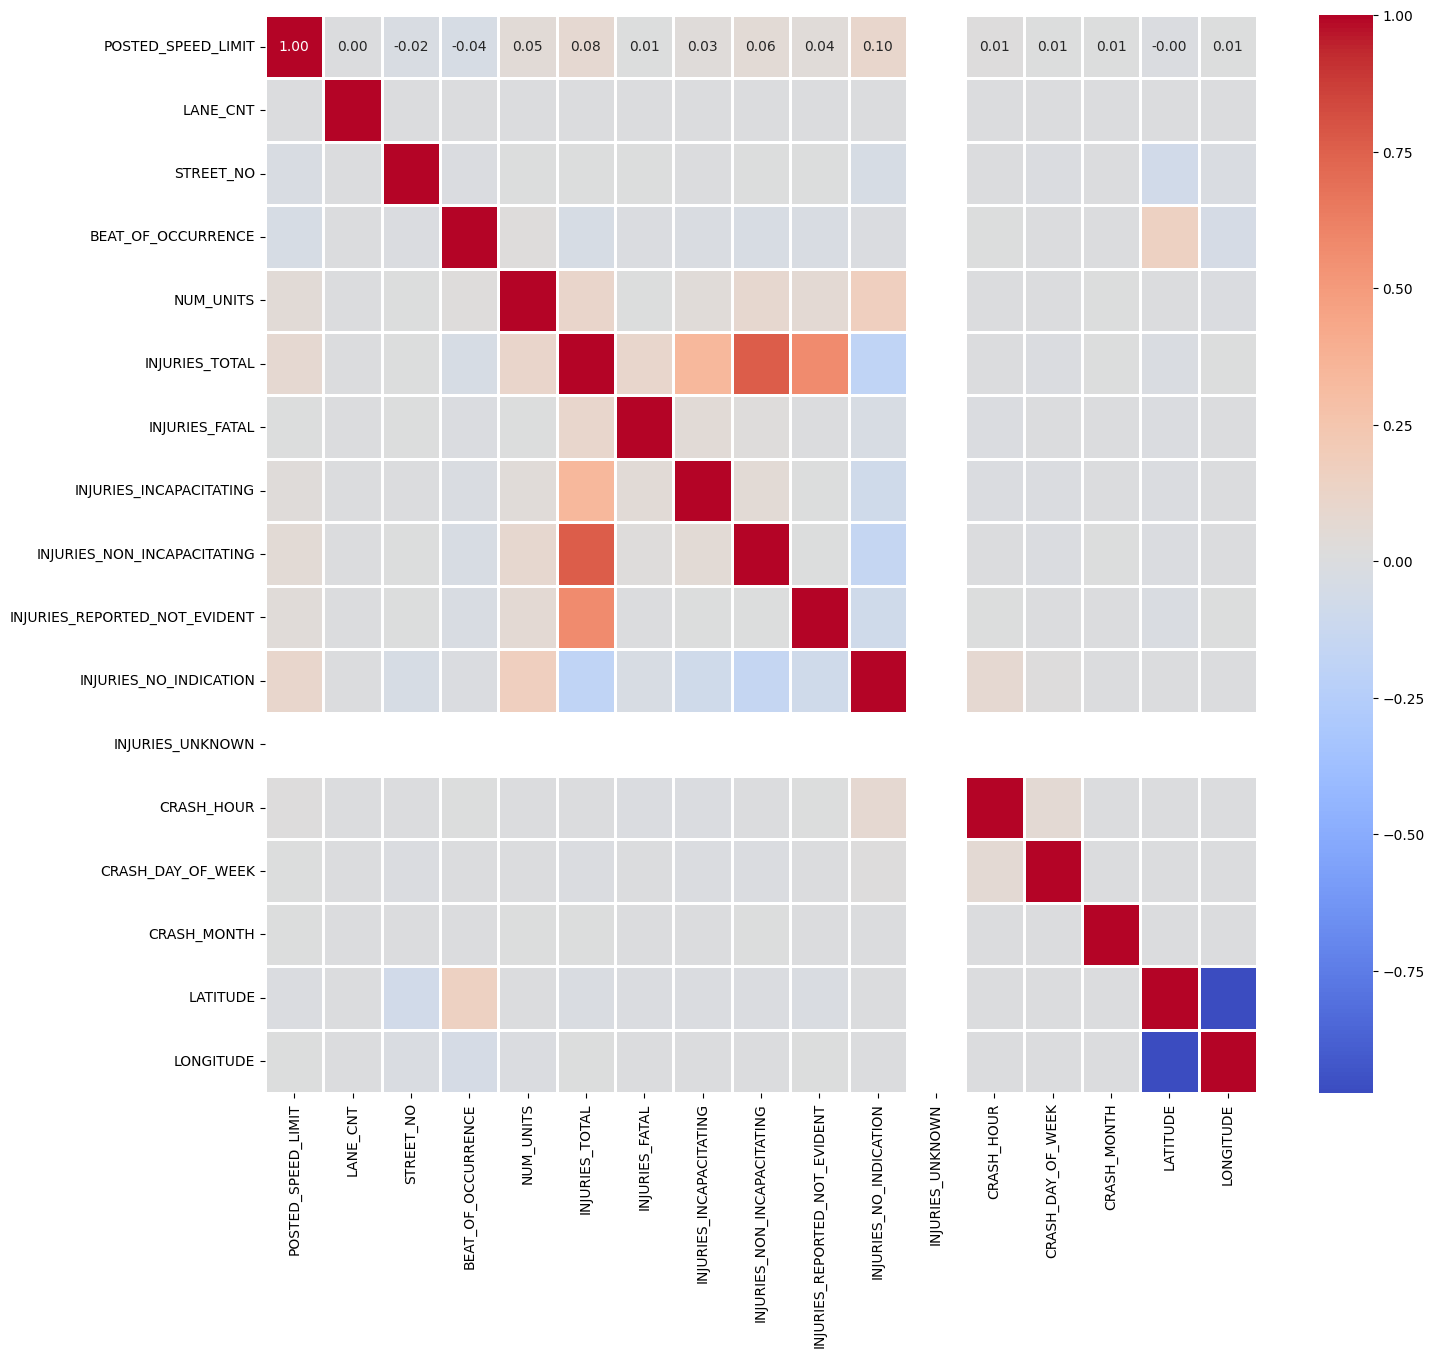

In [40]:
# 2.3.4. HeatMap

def draw_heatmap(correlation_matrix):
    # Create a heatmap using seaborn
    plt.figure(figsize=(16, 14))
    return sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.8)

draw_heatmap(correlation_matrix)

<br>
<br>

## 2.4. Verify Data Quality

2.4.1. Completnesss - Missing Values Summary.<br>
2.4.2. Irregular cardinality, could be one of the following cases:<br>
* Features with a cardinality of 1.
* Too high cardinality for categorical features.
* Too low cardinality for continous features.<br>

2.4.3. Consistency - Handle outliers, out of range data or invalid formats (if any).<br>
2.4.4. Uniqueness - Remove duplicated or irrelevant repetition in data.<br>



In [41]:
# 2.4.1. Completnesss - Missing Values Summary

# Get missing values details
# Retrun value per feature as a numeric value and a percentage
def get_missing_values_details(df):
    # Check for missing values in each column
    missing_values = df.isnull().sum()

    # Check for missing values in the whole DataFrame
    total_missing = missing_values.sum()
    missing_values_sorted = missing_values.sort_values(ascending=False)

    # Check the percentage of missing values for each column
    missing_percentage_sorted = (missing_values_sorted / len(df)) * 100
    return missing_values_sorted, missing_percentage_sorted


def get_completeness_report(df):
    missing_values_sorted, missing_percentage_sorted = get_missing_values_details(df)
    # Create a DataFrame to summarize the completeness
    completeness_report = pd.DataFrame({
        'Missing Values': missing_values_sorted,
        'Missing Percentage': missing_percentage_sorted
    })
    return completeness_report

completeness_report = get_completeness_report(df)
completeness_report


,Missing Values,Missing Percentage
WORKERS_PRESENT_I,813598,99.853950
DOORING_I,812286,99.692926
WORK_ZONE_TYPE,811179,99.557063
WORK_ZONE_I,810132,99.428563
PHOTOS_TAKEN_I,804078,98.685548
STATEMENTS_TAKEN_I,796617,97.769849
NOT_RIGHT_OF_WAY_I,777203,95.387144
CRASH_DATE_EST_I,753867,92.523086
INTERSECTION_RELATED_I,627867,77.058940
LANE_CNT,615780,75.575487


In [97]:
# Section x.y. - Check Ranges & Special Outliers
get_continuous_feature_details(df, 'CRASH_HOUR')
get_continuous_feature_details(df, 'CRASH_DAY_OF_WEEK')
get_continuous_feature_details(df, 'CRASH_MONTH')
get_continuous_feature_details(df, 'LATITUDE')
get_continuous_feature_details(df, 'LONGITUDE')
pass

CRASH_HOUR:
  Unique Len=24
  Unique=0, 1, 2, 3, 4, ..., 19, 20, 21, 22, 23
  Max=23
  Min=0
CRASH_DAY_OF_WEEK:
  Unique Len=7
  Unique=1, 2, 3, 4, 5, ..., 3, 4, 5, 6, 7
  Max=7
  Min=1
CRASH_MONTH:
  Unique Len=12
  Unique=1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12
  Max=12
  Min=1
LATITUDE:
  Unique Len=299300
  Unique=0.0, 41.644670132, 41.64469152, 41.644693974, 41.644694084, ..., 42.022720169, 42.022736319, 42.022754693, 42.022779861, nan
  Max=42.022779861
  Min=0.0
LONGITUDE:
  Unique Len=299263
  Unique=-87.936192947, -87.93587692, -87.934763133, -87.934509717, -87.934014222, ..., -87.524640319, -87.524589014, -87.524587387, 0.0, nan
  Max=0.0
  Min=-87.936192947


<span style="color:cyan">

##### x.y. Check Ranges & Special Outliers
##### Analysis

This section addresses problems mostly in ranges for special features.
For example, week can't be more than 7 days.
Let's go over the descriptive features and provide insights.



| Feature            | Unique Values Len | Unique Values Example    | Max Value | Min Value | Comments                |
|--------------------|-------------------|--------------------------|-----------|-----------|-------------------------|
| CRASH_HOUR         | 24 |  [0 1 2 ... 23]  |  23 | 0 | Time of the crash (0-23)|
| CRASH_DAY_OF_WEEK  | 7 | [1 2 3 4 5 6 7] | 7 | 1 | Day of the week (1-7)   |
| CRASH_MONTH        | 12 | [1 2 3 ... 12] |  12  |  1   | Month of the crash (1-12)|
| LATITUDE           |  299299 |  [ 0 41.64467013 41.64469152 ... 42.02273632 ]      |    42.022779861       |     0.0      | Geographical latitude   |
| LONGITUDE          |  299262  | [-87.93619295 -87.93587692 ... 0] |   0.0        |     -87.936192947      | Geographical longitude  |

<br>

As the table illustrates, the following features have valid values:<br>
* CRASH_HOUR
* CRASH_DAY_OF_WEEK
* CRASH_MONTH

<br>

But the following features has values out of range / outliers in respect to each one type:
* LATITUDE - Min value is 0.0
* LONGITUDE - Max value is 0.0

<br>

Doing research in Google Maps and Google for Chicago city LATITUDE and LONGITUDE range (also NaN, but will be addressing in missing values section), here is our findings:<br>
LATITUDE valid range: [41.640, 42.023]<br>
LONGITUDE valid range: [-87.940, -87.524]<br>

We will address that again in the Data Preprocessing section to clean up the out of range values.

<br>
<br>
<br>

</span>

In [42]:
# 2.4.2. Irregular cardinality - Features with a cardinality of 1

IRREGULAR_CARD_SINGLE = 1             # To detect features with cardinality of 1

def get_irregular_cardinality_with_single_cardinality(df):
    unique_counts = df.nunique()
    # for feature_name, count in unique_counts.items():
    #     if count == 1:
    #         print(f"The feature '{feature_name}' has a unique count of 1 - Irregular Cardinality Issue")
    unique_counts_single_threshold = unique_counts[unique_counts == IRREGULAR_CARD_SINGLE]
    return pd.DataFrame(unique_counts_single_threshold)


get_irregular_cardinality_with_single_cardinality(df)


,0
INJURIES_UNKNOWN,1


In [43]:
# 2.4.2. Irregular cardinality - Too high cardinality for categorical features

IRREGULAR_CARD_MAX_THRESHOLD = 10     # To detect categorical features with high cardinality

def get_unique_counts_exceed_max_threshold_categorical(df):
    cardinality = df.select_dtypes(exclude=['number']).apply(lambda x: x.nunique())
    high_cardinality_cols = cardinality[cardinality > IRREGULAR_CARD_MAX_THRESHOLD].index.tolist()
    # print("High Cardinality Columns:", high_cardinality_cols)
    return high_cardinality_cols

high_cardinality_cols = get_unique_counts_exceed_max_threshold_categorical(df)
# Categorical Features with carinality higher than IRREGULAR_CARD_MAX_THRESHOLD
print(f"Categorical Features with carinality higher than {IRREGULAR_CARD_MAX_THRESHOLD} cardinality are: {high_cardinality_cols}")

Categorical Features with carinality higher than 10 cardinality are: ['CRASH_RECORD_ID', 'CRASH_DATE', 'TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NAME', 'LOCATION']


In [44]:
# 2.4.2. Irregular cardinality - Too low cardinality for continuous features

IRREGULAR_CARD_MIN_THRESHOLD = 10      # To detect continuous features with low cardinality

def get_unique_counts_exceed_min_threshold_continuous(df):
    continuous = df.select_dtypes(include=['number']).apply(lambda x: x.nunique())
    high_cardinality_cols = continuous[continuous < IRREGULAR_CARD_MIN_THRESHOLD].index.tolist()
    # print("High Cardinality Columns:", high_cardinality_cols)
    return high_cardinality_cols
    # cardinality = df.select_dtypes(exclude=['number']).apply(lambda x: x.nunique())
    # unique_counts = df.nunique()
    # unique_counts_below_min_threshold = unique_counts[unique_counts < IRREGULAR_CARD_MIN_THRESHOLD]
    # return pd.DataFrame(unique_counts_below_min_threshold)

get_unique_counts_exceed_min_threshold_continuous(df)


['INJURIES_FATAL', 'INJURIES_UNKNOWN', 'CRASH_DAY_OF_WEEK']

<span style="color:cyan">

##### 2.4.2.  - Irregular Cardinality
##### Analysis

To do - describe the results from above.

Explain why ABOVE NUMBERS ARE OK.

<br>
<br>
<br>

</span>

In [45]:
# 2.4.3. Consistency - Handle outliers, out of range data or invalid formats (if any)

## FIX ME


# Outliers
# def outliers(df, ft):
#     Q1 = df[ft].quantile(0.25)
#     Q3 = df[ft].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
#     return ls

# index_list = []
# for feature in df.columns:
#     if pd.api.types.is_numeric_dtype(df[feature]):
#         index_list.extend(outliers(continuous_features_df, feature))

# # def remove(df, ls):
# #     ls = sorted(set(ls))
# #     df = df.drop(ls)
# #     return df

# print(f"There are {len(set(index_list))} outliers")
# print(f"DataFrame Shape Before Removing Outliers {df.shape}")
# df_cleaned_after_outliers = remove(df_prepared, index_list)
# print(f"DataFrame Shape After  Removing Outliers {df_cleaned_after_outliers.shape}")

In [46]:
# 2.4.4. Uniqueness - Remove duplicated or irrelevant repetition in data

def consistency_check_duplicated_instances(df):
    duplicate_rows = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_rows}")
    # If you want to actually see the duplicate rows, you can use:
    if duplicate_rows > 0:
        print(df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()))

consistency_check_duplicated_instances(df)


Number of duplicate rows: 0


<br>
<br>
<br>

# 3. CRISP-DM: Data Preparation

3.1. Missing Values - Drop or Imputation.<br>
3.2. Irregular Cardinality.<br>
3.3. Outliers - To remove instances.<br>
3.4. Consistency - Invalid formats / Ranges.<br>

More details in each section.

In [114]:
# 3.1. Missing Values (Part-1) - Drop

# For each step, we take a copy. It is easier to debug and investigate.
df_drop_missing_features = df.copy()

# Set the threshold for dropping columns
MISSING_THRESHOLD = 30.0

# Identify columns that have missing value percentage greater than the threshold
columns_to_drop = completeness_report[completeness_report['Missing Percentage'] >= MISSING_THRESHOLD].index

# Drop these columns from the DataFrame
df_drop_missing_features = df_drop_missing_features.drop(columns=columns_to_drop)

# Now, df has the columns dropped where the missing value percentage was higher than 30%
print("Features with missing instances higher than 30% that has been dropped")
columns_to_drop

Features with missing instances higher than 30% that has been dropped


Index(['WORKERS_PRESENT_I', 'DOORING_I', 'WORK_ZONE_TYPE', 'WORK_ZONE_I',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'NOT_RIGHT_OF_WAY_I',
       'CRASH_DATE_EST_I', 'INTERSECTION_RELATED_I', 'LANE_CNT',
       'HIT_AND_RUN_I'],
      dtype='object')

In [115]:
# 3.1. Missing Values (Part-2) - Special handle for LATITUDE and LONGITUDE

df_drop_missing_instances = df_drop_missing_features.copy()


def drop_missing_instances(my_df, my_feature):
    # Remove rows where LATITUDE is NaN
    df_cleaned = my_df.dropna(subset=[my_feature])
    return df_cleaned
drop_missing_instances(df_drop_missing_features, 'LATITUDE')
drop_missing_instances(df_drop_missing_features, 'LATITUDE')
pass


In [116]:
# 3.1. Missing Values (Part-2) - Imputation for values


df_imputation_missing = df_drop_missing_instances.copy()

# Identify columns that have missing value percentage less than the imputation threshold
columns_to_impute = completeness_report[completeness_report['Missing Percentage'] < MISSING_THRESHOLD].index


# Loop through the columns and perform imputation
for column in columns_to_impute:
    # if df_prepared[column].dtype == 'float64' or df[column].dtype == 'int64':
    if df_imputation_missing[column].dtype == 'numeric':
        # Impute numerical columns with the mean value
        df_imputation_missing[column].fillna(df_imputation_missing[column].mean(), inplace=True)
    else:
        # Impute categorical columns with the mode value (the most frequent value)
        df_imputation_missing[column].fillna(df_imputation_missing[column].mode()[0], inplace=True)


In [117]:
# 3.1. Missing Values (Part-3) - Print for visibility of current situation

completeness_report = get_completeness_report(df_imputation_missing)
completeness_report

,Missing Values,Missing Percentage
CRASH_RECORD_ID,0,0.0
CRASH_DATE,0,0.0
POSTED_SPEED_LIMIT,0,0.0
TRAFFIC_CONTROL_DEVICE,0,0.0
DEVICE_CONDITION,0,0.0
WEATHER_CONDITION,0,0.0
LIGHTING_CONDITION,0,0.0
FIRST_CRASH_TYPE,0,0.0
TRAFFICWAY_TYPE,0,0.0
ALIGNMENT,0,0.0


<span style="color:cyan">

##### 3.1. Missing Values -Imputation for values
##### Analysis

# To-Do - Update about the three parts

For missing values higher than 30%, we drop them.
For missing values lower than 30% - we do imputation. To be more accurate, in the terms of our dataset, missing values under 30% ranges between 0.1%-3% missing values so imputation is a very reasonable choice in this case.

Please refer to missing values report in the Data Understanding section.

<br>
<br>
<br>

</span>

In [70]:
# x.y. Drop Duplicated features 

df_drop_location = df_imputation_missing.copy()

df_drop_location = df_drop_location.drop('LOCATION', axis=1)



<span style="color:cyan">

##### x.y. Duplicated Columns - LOCATION is the pair LATITUDE and LONGITUDE
##### Analysis

LOCATION is the pair of values of LONGITUDE and LATITUDE, we choose to drop it due to two reasons:
1. It is duplication of other features (aggregation of LONGITUDE and LATITUDE in pairs will result in LOCATION).
2. It is categorical feature, with high class dimensionality - meaning, in the encoding phase to prepare for modeling, it will generate very big number of derived features. In the other hand, LONGITUDE and LATITUDE is numeric and much easier to the handling in modeling phase.

<br>
<br>
<br>

</span>

In [104]:
# Section x.y. - Fix Ranges and Special Outliers

df_fix_range_issues = df_drop_location.copy()

print("========================== Values Before ==========================")
crash_latitude_unique_values, crash_latitude_unique_values, crash_latitude_max_value, crash_latitude_min_value = get_continuous_feature_details(df_fix_range_issues, 'LATITUDE')
crash_longitude_unique_values, crash_longitude_unique_values, crash_longitude_max_value, crash_longitude_min_value = get_continuous_feature_details(df_fix_range_issues, 'LONGITUDE')

# To remove values for my_feature outside a given range range (including min_value and max_value)
def remove_invalid_values_outside_given_range(my_df, my_feature, min_value, max_value):
    # Create a mask for values within the range
    valid_mask = (my_df[my_feature] >= min_value) & (my_df[my_feature] <= max_value)
    # Apply the mask to the DataFrame
    filtered_df = my_df[valid_mask]
    return filtered_df

# Define the valid range for LATITUDE
min_latitude = 41.640
max_latitude = 42.023
df_fix_range_issues = remove_invalid_values_outside_given_range(df_fix_range_issues, 'LATITUDE', min_latitude, max_latitude)

# Define the valid range for LONGITUDE
min_longitude = -87.940
max_longitude = -87.524
df_fix_range_issues = remove_invalid_values_outside_given_range(df_fix_range_issues, 'LONGITUDE', min_longitude, max_longitude)


print("========================== Values After ==========================")
crash_latitude_unique_values, crash_latitude_unique_values, crash_latitude_max_value, crash_latitude_min_value = get_continuous_feature_details(df_fix_range_issues, 'LATITUDE')
crash_longitude_unique_values, crash_longitude_unique_values, crash_longitude_max_value, crash_longitude_min_value = get_continuous_feature_details(df_fix_range_issues, 'LONGITUDE')

get_continuous_features_tabular_report(df_fix_range_issues).transpose()


========================== Values Before ==========================
LATITUDE:
  Unique Len=299299
  Unique=0.0, 41.644670132, 41.64469152, 41.644693974, 41.644694084, ..., 42.02266893, 42.022720169, 42.022736319, 42.022754693, 42.022779861
  Max=42.022779861
  Min=0.0
LONGITUDE:
  Unique Len=299262
  Unique=-87.936192947, -87.93587692, -87.934763133, -87.934509717, -87.934014222, ..., -87.524645905, -87.524640319, -87.524589014, -87.524587387, 0.0
  Max=0.0
  Min=-87.936192947
========================== Values After ==========================
LATITUDE:
  Unique Len=299298
  Unique=41.644670132, 41.64469152, 41.644693974, 41.644694084, 41.644701941, ..., 42.02266893, 42.022720169, 42.022736319, 42.022754693, 42.022779861
  Max=42.022779861
  Min=41.644670132
LONGITUDE:
  Unique Len=299261
  Unique=-87.936192947, -87.93587692, -87.934763133, -87.934509717, -87.934014222, ..., -87.524673948, -87.524645905, -87.524640319, -87.524589014, -87.524587387
  Max=-87.524587387
  Min=-87.936192947

,count,mean,std,min,25%,50%,75%,max
POSTED_SPEED_LIMIT,814739.0,28.405457,6.167959,0.000000,30.000000,30.000000,30.000000,99.000000
STREET_NO,814739.0,3689.571222,2886.773961,0.000000,1250.000000,3201.000000,5600.000000,451100.000000
BEAT_OF_OCCURRENCE,814739.0,1243.650720,705.317935,111.000000,714.000000,1211.000000,1822.000000,6100.000000
NUM_UNITS,814739.0,2.034868,0.452715,1.000000,2.000000,2.000000,2.000000,18.000000
INJURIES_TOTAL,814739.0,0.189380,0.565089,0.000000,0.000000,0.000000,0.000000,21.000000
INJURIES_FATAL,814739.0,0.001188,0.037322,0.000000,0.000000,0.000000,0.000000,4.000000
INJURIES_INCAPACITATING,814739.0,0.019895,0.165109,0.000000,0.000000,0.000000,0.000000,10.000000
INJURIES_NON_INCAPACITATING,814739.0,0.106844,0.421659,0.000000,0.000000,0.000000,0.000000,21.000000
INJURIES_REPORTED_NOT_EVIDENT,814739.0,0.061453,0.318451,0.000000,0.000000,0.000000,0.000000,15.000000
INJURIES_NO_INDICATION,814739.0,2.003318,1.155848,0.000000,1.000000,2.000000,2.000000,61.000000


<span style="color:cyan">

##### x.y. Fix Ranges and Special Outliers
##### Analysis

LOCATION is the pair of values of LONGITUDE and LATITUDE, we choose to drop it due to two reasons:
1. It is duplication of other features (aggregation of LONGITUDE and LATITUDE in pairs will result in LOCATION).
2. It is categorical feature, with high class dimensionality - meaning, in the encoding phase to prepare for modeling, it will generate very big number of derived features. In the other hand, LONGITUDE and LATITUDE is numeric and much easier to handling in modeling phase.

<br>
<br>
<br>

</span>

In [ ]:
# x.y. - Fix Ranges, special outliers and formats
# Please refer to Data Understanding section or to my next comment, I have summarized all here for visibility


In [118]:

df_values_count = df_fix_range_issues.copy()

dump_feature_frequency_to_a_file(df_values_count ,'POSTED_SPEED_LIMIT')


dump_feature_frequency_to_a_file(df_values_count ,'DAMAGE')
dump_feature_frequency_to_a_file(df_values_count ,'CRASH_TYPE')
dump_feature_frequency_to_a_file(df_values_count ,'REPORT_TYPE')


In [49]:
# 3.3. Outliers - To remove instances.

df_clean_outliers = df_imputation_missing.copy()

# def outliers1(df, ft):
#     Q1 = df[ft].quantile(0.25)
#     Q3 = df[ft].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
#     return ls

# index_list = []
# for feature in df_prepared.columns:
#     if pd.api.types.is_numeric_dtype(df_prepared[feature]):
#         index_list.extend(outliers1(df_prepared, feature))

# def remove(df, ls):
#     ls = sorted(set(ls))
#     df = df.drop(ls)
#     return df

# print(f"There are {len(set(index_list))} outliers")
# print(f"DataFrame Shape Before Removing Outliers {df_prepared.shape}")
# df_cleaned_after_outliers = remove(df_prepared, index_list)
# print(f"DataFrame Shape After  Removing Outliers {df_cleaned_after_outliers.shape}")


<span style="color:cyan">

##### 3.3. Outliers - To remove instances
##### Analysis

To-Do

Please refer to the outliers section report in the Data Understanding section.

</span>

In [50]:
# 3.4. Consistency - Invalid formats / Ranges

df_cleaned = df_clean_outliers.copy()

# Convert CRASH_DATE to datetime
df_cleaned['CRASH_DATE'] = pd.to_datetime(df_cleaned['CRASH_DATE'])

# Extract components from CRASH_DATE
df_cleaned['YEAR'] = df_cleaned['CRASH_DATE'].dt.year

# 4. CRISP-DM: Modeling

**Section Overview**

4.1. Import relevant ML libs for Modeling.<br>
4.2. Formaluize a Numerical Measure for the Target Variable(s).<br>
4.3. Undersampling - To fix over-representation in the dataset (unbalanced data).<br>
4.4. Modeling with Random Forest.<br>
4.5. Modeling with Logestic Regression.<br>
4.6. Modeling with DNN.<br>
4.7. Modeling with KNN.<br>

In [51]:
# 4.1. Import relevant ML libs for Modeling

from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

In [52]:
# 4.2. Formaluize a Numerical Measure for the Target Variable(s)

df_to_model = df_cleaned.copy()

# Building our numerical metrics for measuring the Severity of injuries based on the reported injuries in the dataset
df_to_model['SEVERITY_OF_INJURIES'] = ((0.3 * df_to_model['INJURIES_NON_INCAPACITATING'] + 
                                 0.6 * df_to_model['INJURIES_INCAPACITATING'] + 
                                 # Assuming we might use 'INJURIES_INCAPACITATING' or another column for fatal injuries representation
                                 0.1 * df_to_model['INJURIES_NO_INDICATION'] + df_to_model['INJURIES_FATAL']) / 
                                ((df_to_model['INJURIES_NON_INCAPACITATING'] + 
                                      df_to_model['INJURIES_INCAPACITATING'] + 
                                      # Again, assuming a placeholder for fatal injuries if needed
                                      df_to_model['INJURIES_NO_INDICATION']+df_to_model['INJURIES_FATAL'])))

# Code to create the "INJURY_CLASS" feature based on "SEVERITY_OF_INJURIES"
df_to_model['INJURY_ClASS'] = df_to_model['SEVERITY_OF_INJURIES'].apply(lambda x: 'HIGH INJURY' if x > 0.2 else 'LIGHT INJURY')

# Code to create the "SEVERITY_CLASS" feature based on "INJURIES_FATAL" and "INJURIES_INCAPACITATING"
df_to_model['SEVERITY_CLASS'] = df_to_model.apply(lambda x: 'HIGH SEVERITY' if x['INJURIES_FATAL'] > 0 or x['INJURIES_INCAPACITATING'] > 0 else 'LOW SEVERITY', axis=1)

# Display the first few rows to see the new feature
df_to_model[['INJURIES_NON_INCAPACITATING','INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NO_INDICATION', 'SEVERITY_OF_INJURIES','INJURY_ClASS','SEVERITY_CLASS']].head()

,INJURIES_NON_INCAPACITATING,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NO_INDICATION,SEVERITY_OF_INJURIES,INJURY_ClASS,SEVERITY_CLASS
0,1.0,0.0,0.0,1.0,0.20,LIGHT INJURY,LOW SEVERITY
1,0.0,0.0,0.0,1.0,0.10,LIGHT INJURY,LOW SEVERITY
2,1.0,0.0,0.0,1.0,0.20,LIGHT INJURY,LOW SEVERITY
3,0.0,1.0,0.0,1.0,0.55,HIGH INJURY,HIGH SEVERITY
4,0.0,0.0,0.0,1.0,0.10,LIGHT INJURY,LOW SEVERITY


<span style="color:cyan">

##### 4.2. Formaluize a Numerical Measure for the Target Variable(s)
##### Analysis

Our target variable is represented via 4 variables were each one giving the following indications:
* INJURIES_NO_INDICATION - No injury or light reported.
* INJURIES_NON_INCAPACITATING - Medium injury.
* INJURIES_INCAPACITATING - Heavy.
* INJURIES_FATAL - Death.

To build a mesurement to estimate the fatality of the crash injury crash, we define a weighted equation for each class and normalize it.


</span>

In [53]:

# Preparing features and target variables 
X = df_to_model.drop(['SEVERITY_OF_INJURIES','INJURIES_TOTAL' ,'INJURIES_INCAPACITATING', 'MOST_SEVERE_INJURY','INJURY_ClASS','SEVERITY_CLASS',
                  'INJURIES_NON_INCAPACITATING', 'SEVERITY_CLASS','INJURIES_NO_INDICATION','CRASH_DATE',
                  'INJURIES_UNKNOWN', 'DATE_POLICE_NOTIFIED','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_FATAL','CRASH_RECORD_ID','LOCATION','STREET_NAME'],axis = 1)
y = df_to_model['SEVERITY_CLASS']
X = pd.get_dummies(X)

# Initialize the random under-sampler due to unbalanced dataset
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = rus.fit_resample(X, y)

In [54]:
# 4.4. Modeling with Random Forest

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with balanced class weights
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Fitting the model to the training data
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_results = classification_report(y_test, y_pred)

print("Accuracy of Random Forest Classifier:", accuracy)
print("\nClassification Report:\n", classification_report_results)


Accuracy of Random Forest Classifier: 0.8659969351268517

Classification Report:
                precision    recall  f1-score   support

HIGH SEVERITY       0.79      0.99      0.88      2934
 LOW SEVERITY       0.99      0.74      0.85      2939

     accuracy                           0.87      5873
    macro avg       0.89      0.87      0.86      5873
 weighted avg       0.89      0.87      0.86      5873



### Important Features
based on RF classifier I check the important features for detecting the severity of injuries in the accident.

In [55]:
importances = rf_classifier.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

feature_importances.head()

,Feature,Importance
116,CRASH_TYPE_INJURY AND / OR TOW DUE TO CRASH,0.216343
117,CRASH_TYPE_NO INJURY / DRIVE AWAY,0.198459
114,REPORT_TYPE_NOT ON SCENE (DESK REPORT),0.040867
115,REPORT_TYPE_ON SCENE,0.035144
7,LATITUDE,0.029891


In [56]:
# 4.5. Modeling with Logestic Regression

# Initialize the Logistic Regression model with balanced class weights
log_reg = LogisticRegression( max_iter=10000, random_state=42)

# Fitting the model to the training data
log_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = log_reg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_results = classification_report(y_test, y_pred)

print("Accuracy of linear regressor:", accuracy)
print("\nClassification Report:\n", classification_report_results)


Accuracy of linear regressor: 0.8641239570917759

Classification Report:
                precision    recall  f1-score   support

HIGH SEVERITY       0.79      0.99      0.88      2934
 LOW SEVERITY       0.99      0.74      0.84      2939

     accuracy                           0.86      5873
    macro avg       0.89      0.86      0.86      5873
 weighted avg       0.89      0.86      0.86      5873



### Important features

In [57]:
# Get the feature names
feature_names = X_resampled.columns

# Get the coefficients from the logistic regression model
coefficients = log_reg.coef_[0]  # Assuming binary classification, hence [0]

# Create a series to map feature names to their coefficients
feature_importance = pd.Series(coefficients, index=feature_names)

# Sort the features by their absolute values to see the most significant ones
feature_importance_sorted = feature_importance.abs().sort_values(ascending=False)

feature_importance_sorted.head()

CRASH_TYPE_INJURY AND / OR TOW DUE TO CRASH    4.074052
CRASH_TYPE_NO INJURY / DRIVE AWAY              4.067057
FIRST_CRASH_TYPE_PEDESTRIAN                    1.232599
FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE          1.192556
LONGITUDE                                      1.051384
dtype: float64

In [58]:
# 4.6. Modeling with DNN

# It's important to scale your input features for neural networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the DNN model
mlp = MLPClassifier(hidden_layer_sizes=(20,20,10), activation='relu', solver='adam',
                    max_iter=100, random_state=42, verbose=False)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_results = classification_report(y_test, y_pred)

print("Accuracy of DNN model:", accuracy)
print("\nClassification Report:\n", classification_report_results)

Accuracy of DNN model: 0.8329644134173335

Classification Report:
                precision    recall  f1-score   support

HIGH SEVERITY       0.80      0.89      0.84      2934
 LOW SEVERITY       0.87      0.78      0.82      2939

     accuracy                           0.83      5873
    macro avg       0.84      0.83      0.83      5873
 weighted avg       0.84      0.83      0.83      5873



In [59]:
# 4.7. Modeling with KNN

# Initialize the KNN classifier
# n_neighbors is set to 10 as an example, but you should tune this parameter
knn = KNeighborsClassifier(n_neighbors=10)

# Train the model
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_results = classification_report(y_test, y_pred)

print("Accuracy of KNN model:", accuracy)
print("\nClassification Report:\n", classification_report_results)

Accuracy of KNN model: 0.786821045462285

Classification Report:
                precision    recall  f1-score   support

HIGH SEVERITY       0.74      0.89      0.81      2934
 LOW SEVERITY       0.86      0.69      0.76      2939

     accuracy                           0.79      5873
    macro avg       0.80      0.79      0.78      5873
 weighted avg       0.80      0.79      0.78      5873



# 5. CRISP-DM: Evaluation

in this section I just want to check our model performance on the unseen dataset which is all of them are 'LOW SEVERITY" and check if it has good accuracy or not.

In [60]:

df_to_evaluate = df_to_model.copy()

# Separate instances with "high injury" and "low injury" classes 
high_injury_instances = df_to_evaluate[df_to_evaluate['SEVERITY_CLASS'] == 'HIGH SEVERITY']
low_injury_instances = df_to_evaluate[df_to_evaluate['SEVERITY_CLASS'] == 'LOW SEVERITY']

# Sample the same number of instances with "low injury" class as "high injury" instances
num_high_injury = len(high_injury_instances)
low_injury_sampled = low_injury_instances.sample(n=num_high_injury, random_state=42)

# Check the model's predictions on the remaining instances with "low injury" class
low_injury_remaining = low_injury_instances.drop(low_injury_sampled.index)

# Concatenate the sampled instances of both classes to create a balanced dataset
balanced_data = pd.concat([high_injury_instances, low_injury_sampled])


# Prepare features and target variable
X_train_balanced = balanced_data.drop(['SEVERITY_OF_INJURIES','INJURIES_TOTAL' ,'INJURIES_INCAPACITATING', 'MOST_SEVERE_INJURY','INJURY_ClASS','SEVERITY_CLASS',
                  'INJURIES_NON_INCAPACITATING', 'SEVERITY_CLASS','INJURIES_NO_INDICATION','CRASH_DATE',
                  'INJURIES_UNKNOWN', 'DATE_POLICE_NOTIFIED','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_FATAL','CRASH_RECORD_ID','LOCATION','STREET_NAME'],axis = 1)
y_train_balanced = balanced_data['SEVERITY_CLASS']

X_test_balanced = low_injury_remaining.drop(['SEVERITY_OF_INJURIES','INJURIES_TOTAL' ,'INJURIES_INCAPACITATING', 'MOST_SEVERE_INJURY','INJURY_ClASS','SEVERITY_CLASS',
                  'INJURIES_NON_INCAPACITATING', 'SEVERITY_CLASS','INJURIES_NO_INDICATION','CRASH_DATE',
                  'INJURIES_UNKNOWN', 'DATE_POLICE_NOTIFIED','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_FATAL','CRASH_RECORD_ID','LOCATION','STREET_NAME'],axis = 1)

y_test_balanced = low_injury_remaining['SEVERITY_CLASS']


X_train_balanced = pd.get_dummies(X_train_balanced)
X_test_balanced = pd.get_dummies(X_test_balanced)





# Combine the training and testing feature data for consistent one-hot encoding
combined_features = pd.concat([X_train_balanced, X_test_balanced], axis=0)

# Apply get_dummies to the combined dataset
combined_features_encoded = pd.get_dummies(combined_features)

# Now split them back into training and testing sets
X_train_encoded = combined_features_encoded.iloc[:len(X_train_balanced), :]
X_test_encoded = combined_features_encoded.iloc[len(X_train_balanced):, :]

# Ensure the data is scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


# Train the KNN model on the scaled, balanced training data
knn.fit(X_train_scaled, y_train_balanced)

# Make predictions on the scaled, balanced testing set
y_pred = knn.predict(X_test_scaled)

# Evaluate the predictions
accuracy = accuracy_score(y_test_balanced, y_pred)
classification_report_results = classification_report(y_test_balanced, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_results)



Accuracy: 0.7116551060319012

Classification Report:
                precision    recall  f1-score   support

HIGH SEVERITY       0.00      0.00      0.00         0
 LOW SEVERITY       1.00      0.71      0.83    785424

     accuracy                           0.71    785424
    macro avg       0.50      0.36      0.42    785424
 weighted avg       1.00      0.71      0.83    785424



# 6. CRISP-DM: Deployment

To-Do.